#### Inicializando

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def autolabel(rects):
    """Anexa uma etiqueta de texto acima de cada barra mostrando seu valor."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'R${height:,.0f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 pontos verticais de deslocamento
                    textcoords="offset points",
                    ha='center', va='bottom')

# Treinamento de Análises Financeiras

### Ementa

1. Conceitos Básicos
2. Taxas e Retornos
3. Operações com fluxo de caixa
4. Análise de Investimento (parte 1)
5. Análise de Investimento (parte 2)
6. Alavancagem & Project Finance

### Roteiro - Conceitos Básicos

1. Matemática Financeira
2. Dinheiro e o Tempo
3. Desenho de Fluxo de Caixa
4. Os Juros
5. Fluxo de caixa envolvendo juros
6. Tipos de Juros
7. Efeitos de Juros sobre Juros

# Matemática financeira

Resumidamente, é a aplicação da matemática para resolução de problemas financeiros, com elemento principal o valor do tempo ao longo do tempo em função da taxa de juros.

Seus pilares fundamentais são:

1. O valor monetário - Quanto vale ...?
2. O tempo - ... em quanto tempo?
3. A referência - Vale a pena?

Qualquer tomada de decisão financeira necessita a análise dos três pilares
fundamentais.

## 1. Dinheiro e o tempo

Mesmo analisando em termos teóricos, todos têm noção que o valor do dinheiro muda em relação ao tempo.

- Situação 1: “Eu compro o seu Corolla por R\$ 150 mil e pago hoje.”
- Situação 2: “Eu compro o seu Corolla por R\$ 150 mil e pago daqui a 1 ano.”

#### Fatores que influenciam o valor do dinheiro no tempo
- Inflação – exemplo: poder de compra;
- Oferta e demanda – exemplo: bitcoin;
- Investimentos – exemplo: taxa de juros básicos;

### Regra Fundamental

Nunca realizar operações de soma e/ou subtração em valores que não estejam no
mesmo período.

## 2. Desenho do Fluxo de Caixa

Fluxo de caixa é o conjunto de entradas e saídas de dinheiro (caixa) ao longo do tempo.

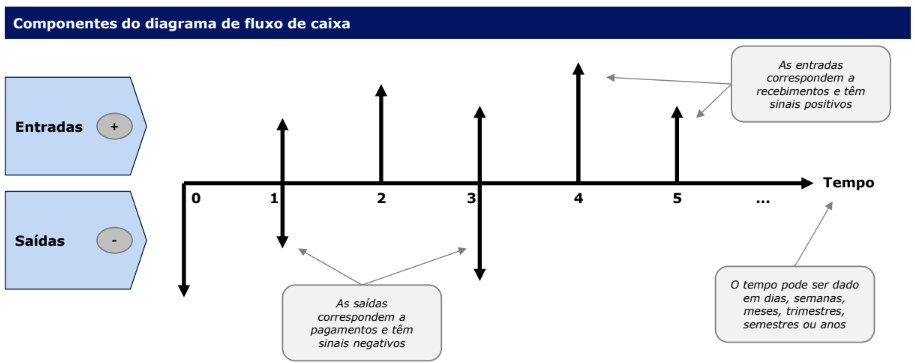

### Exemplo

A TechInova, uma startup de tecnologia focada em soluções de automação para pequenas empresas, experimentou um primeiro semestre cheio de atividades financeiras significativas. Em janeiro, a empresa concluiu uma rodada de investimento que gerou uma entrada de R\$1.200,00, permitindo-lhes expandir suas operações. No entanto, houve uma saída de R\$1.000,00 principalmente devido a custos com a contratação de novos desenvolvedores e despesas de marketing para lançar sua nova plataforma.

Em fevereiro, as entradas subiram para R\$1.400,00 graças ao aumento das vendas, impulsionadas pela recente campanha de marketing. As saídas também aumentaram para R\$1.100,00, uma vez que a empresa investiu em equipamentos de TI para suportar o aumento da carga de trabalho.

Março viu a TechInova iniciar um novo projeto de P&D, financiado em parte por uma entrada de R\$1.500,00. As saídas foram mais moderadas, de R\$800,00, refletindo uma estabilização das despesas operacionais após o período inicial de expansão.

Abril trouxe uma entrada de R\$1.600,00, derivada tanto de vendas sólidas quanto de subvenções para inovação tecnológica. As saídas foram de R$850,00, com investimentos contínuos em treinamento e desenvolvimento da equipe.

Maio foi um mês excelente, com entradas atingindo R\$1.800,00 graças a novos contratos com grandes clientes corporativos, enquanto as saídas foram de R\$950,00, gastas na melhoria das infraestruturas de suporte ao cliente.

Finalmente, em junho, a TechInova alcançou uma entrada de R\$2.000,00, seu melhor mês até então, indicativo de um crescimento robusto e sustentável. As saídas se mantiveram em R\$1.000,00, balanceadas entre novas contratações e expansão do escritório.

In [3]:
# Dados fictícios: meses e valores de entradas e saídas de caixa
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho']
entradas = [1200, 1400, 1500, 1600, 1800, 2000]
saidas = [-1000, -1100, -800, -850, -950, -1000]

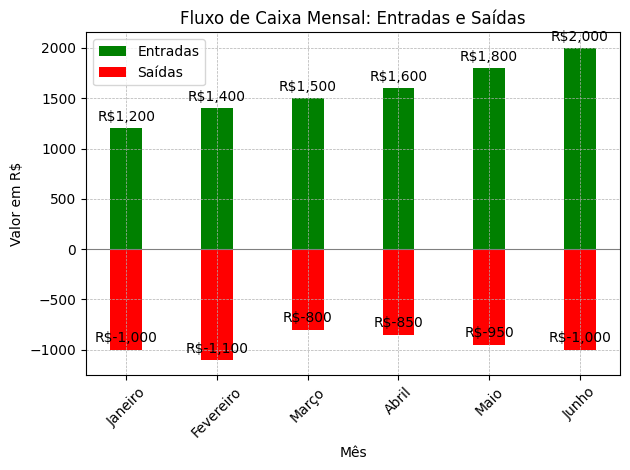

In [4]:
x = np.arange(len(meses))  # Localização no eixo x para os grupos
largura = 0.35  # Largura das barras

fig, ax = plt.subplots()
rects1 = ax.bar(x, entradas, largura, label='Entradas', color='green')
rects2 = ax.bar(x, saidas, largura, label='Saídas', color='red')

# Adicionar anotações no gráfico
ax.axhline(0, color='grey', linewidth=0.8)

autolabel(rects1)
autolabel(rects2)

# Configurações do gráfico
ax.set_title('Fluxo de Caixa Mensal: Entradas e Saídas')
ax.set_ylabel('Valor em R$')
ax.set_xlabel('Mês')
ax.set_xticks(x)
ax.set_xticklabels(meses)
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A elaboração do fluxo de caixa é indispensável na análise de rentabilidade e custos de operações financeiras, no estudo de viabilidade econômica de projetos e investimentos.

## 3. Os Juros

Remuneração do capital pelo uso do dinheiro por um período de tempo.

### Pagamento de um aluguel

**Lucas** decidiu alugar um apartamento em uma área central da cidade para ficar mais próximo de seu local de trabalho.  O valor do aluguel mensal é de R\$1.200,00. Lucas pagará esse aluguel durante os seis anos de locação.

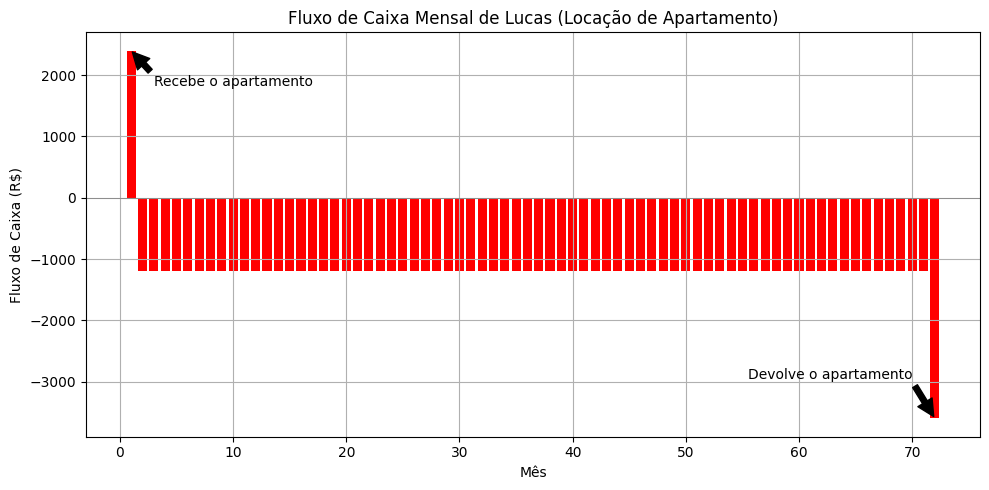

In [5]:
# Configurando os dados
meses = np.arange(1, 73)  # De 1 a 72 meses
fluxo_caixa = [-1200 if i != 72 else -3600 for i in range(1, 73)]  # -1200 mensal, último mês +3600

# Pagamento inicial do calção no primeiro mês
fluxo_caixa[0] += 3600  # Adicionando mais -3600 no primeiro mês

# Criando o gráfico
plt.figure(figsize=(10, 5))
plt.bar(meses, fluxo_caixa, color='red')
plt.title('Fluxo de Caixa Mensal de Lucas (Locação de Apartamento)')
plt.xlabel('Mês')
plt.ylabel('Fluxo de Caixa (R$)')
plt.axhline(0, color='gray', linewidth=0.5)

# Anotações para melhorar a compreensão
plt.annotate('Recebe o apartamento', xy=(1, fluxo_caixa[0]), xytext=(3, 2000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='left', verticalalignment='top')

plt.annotate('Devolve o apartamento', xy=(72, fluxo_caixa[-1]), xytext=(70, -3000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='right', verticalalignment='bottom')

plt.grid(True)
plt.tight_layout()
plt.show()

**Mariana** decidiu tomar um empréstimo de 10 mil reais para investir em seu próprio negócio de design gráfico. O acordo do empréstimo estabelece que ela deve pagar apenas juros mensais de 1 mil reais durante a duração do empréstimo, que é de 1 ano, e reembolsar o valor principal de 10 mil reais ao final desse período.

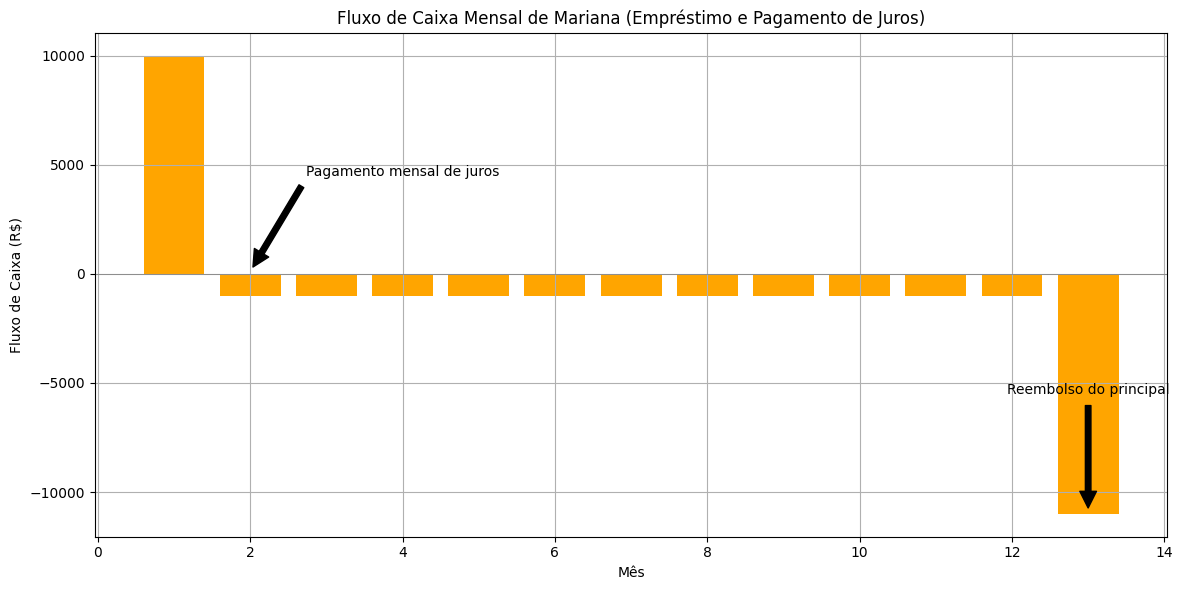

In [6]:
# Configurando os dados
meses = np.arange(1, 14)  # De 1 a 13 meses
fluxo_caixa = [-1000 if i != 13 else -11000 for i in range(1, 14)]  # -1000 mensalmente, no último mês -1100

# Recebimento do empréstimo no primeiro mês
fluxo_caixa[0] = 10000

# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.bar(meses, fluxo_caixa, color='orange')
plt.title('Fluxo de Caixa Mensal de Mariana (Empréstimo e Pagamento de Juros)')
plt.xlabel('Mês')
plt.ylabel('Fluxo de Caixa (R$)')
plt.axhline(0, color='gray', linewidth=0.5)

# Anotações para melhorar a compreensão
plt.annotate('Pagamento mensal de juros', xy=(2, 100), xytext=(4, 5000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='top')

plt.annotate('Reembolso do principal', xy=(13, fluxo_caixa[-1]), xytext=(13, -5000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='top')

plt.grid(True)
plt.tight_layout()
plt.show()

## 4. Fluxo de caixa envolvendo juros

Saber desenhar o fluxo de caixa ajuda a compreender os componentes envolvidos nas operações matemáticas.

### Exemplificando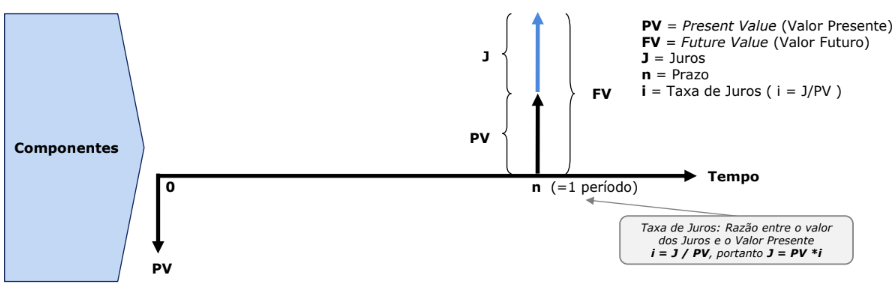

In [7]:
calc_valor_futuro_1 = lambda vp, j : vp + j
calc_valor_futuro_2 = lambda vp, i : vp + (vp * i)
calc_valor_futuro_3 = lambda vp, i : vp * (1 + i)
calc_taxa = lambda vp, vf : (vf / vp) - 1
calc_juros = lambda vp, i : vp * i

$$
  i = \frac{VF}{VP} - 1
$$

In [8]:
valor_presente = 10000
juros = 1000

calc_valor_futuro_1(valor_presente,juros)

11000

### Exemplo

Um trader de equities do Goldman Sachs alocou R\$ 100 milhões em ações em 1 janeiro de 2023, desfazendo toda a sua posição no dia 31 de dezembro de 2023, resultando em um saldo de R\$ 143 milhões.

In [9]:
valor_presente = 100000
valor_futuro = 143000
taxa = calc_taxa(valor_presente, valor_futuro) * 100

print(f'Rendeu a uma taxa de {taxa:,.0f}%')

Rendeu a uma taxa de 43%


## 5. Tipos de Juros

 ### Juros Simples

No regime de capitalização de juros simples, a taxa de juros (i) incide somente sobre o capital inicial (PV).

Equações:
* $ VF(n) = VP + n * J $
* $ J = PV * i $
* $ VF = VP + (VP * n * i) $
* $ VF = VP * (1 + n * i) $



In [10]:
# Definindo os parâmetros do empréstimo
principal_inicial = 100e6  # Valor do empréstimo
taxa_juros = 0.1  # 10% ao ano
anos = 5

# Criando listas para armazenar os valores
pagamentos_principal = [principal_inicial / anos] * anos  # Dividindo o principal igualmente
juros_anuais = [principal_inicial * taxa_juros * n for n in range(anos)]  # Juros decrescem à medida que o principal é pago

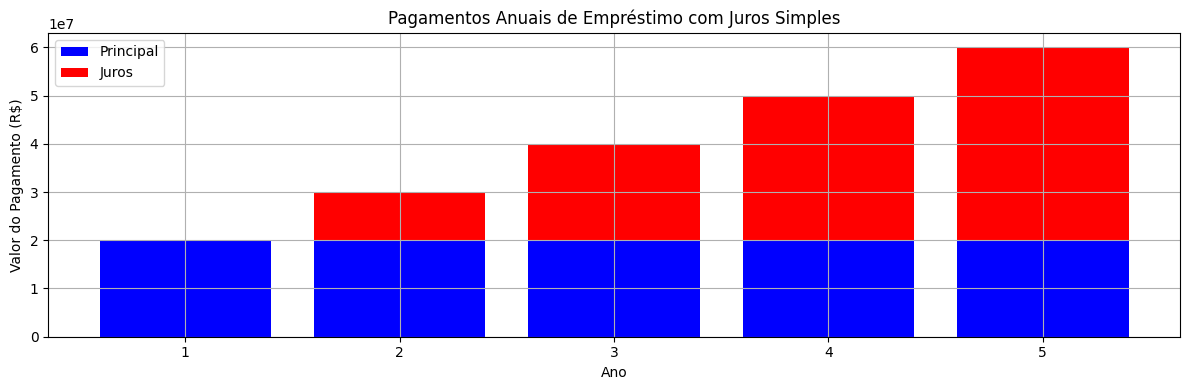

In [11]:
# Dados para o gráfico
anos_array = np.arange(1, anos + 1)

# Criando o gráfico de barras empilhadas
plt.figure(figsize=(12, 4))
plt.bar(anos_array, pagamentos_principal, label='Principal', color='blue')
plt.bar(anos_array, juros_anuais, bottom=pagamentos_principal, label='Juros', color='red')
plt.title('Pagamentos Anuais de Empréstimo com Juros Simples')
plt.xlabel('Ano')
plt.ylabel('Valor do Pagamento (R$)')
plt.xticks(anos_array)
plt.legend()

# Mostrando o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

### Exemplo

Um trader de renda fixa do JP Morgan alocou R$ 100 milhões em títulos públicos (valor de face original) que pagam cupons anuais de 10% em 1 janeiro de 2018, desfazendo toda sua posição no dia 31 de dezembro de 2023 (final do período dos títulos). Por alguma distração os cupons não foram reinvestidos, ficando na conta corrente.

In [12]:
# Definindo os parâmetros do investimento
taxa_cupom = 0.10  # 10% ao ano
anos = np.arange(2018, 2025)  # De 2018 a 2023
valor_inicial = 100e6
valor_presente = np.array([100e6 for i in anos])  # R$ 100 milhões

# Calculando os valores dos cupons anuais
cupom = valor_inicial * taxa_cupom
cupons = [0] + [cupom] * (len(anos)-1)
saldo = np.cumsum(cupons) - cupons

saidas = [0] * len(anos)
saidas[0] -= valor_inicial #investimento inicial
resgate = [0] * len(anos)
resgate[-1] += valor_inicial # Adicionando o reembolso do principal no último ano

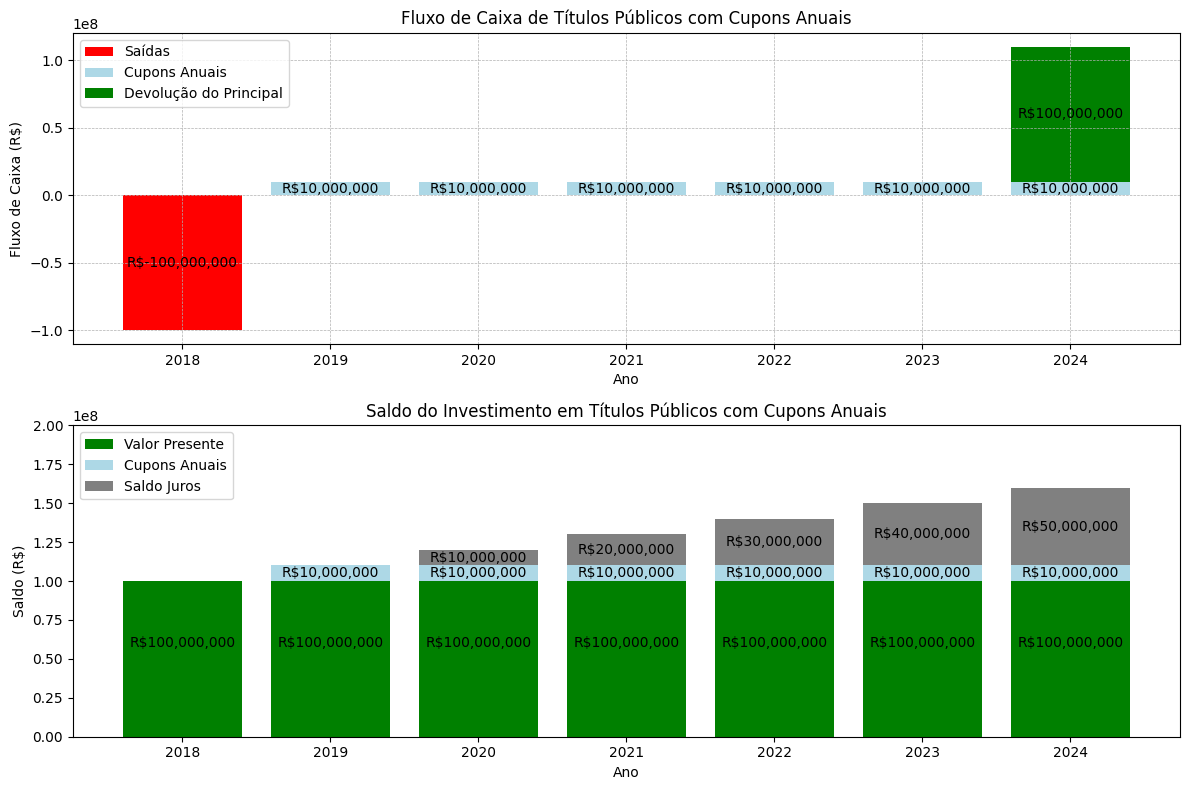

In [13]:
# Criando o gráfico de barras
fig, ax = plt.subplots(2,1,figsize=(12, 8))

ax[0].bar(anos, saidas, color='red', label='Saídas')
ax[0].bar(anos, cupons, color='lightblue', label='Cupons Anuais')
ax[0].bar(anos, resgate, bottom=cupons[-1], color='green', label='Devolução do Principal')

# Configurações do gráfico
ax[0].set_title('Fluxo de Caixa de Títulos Públicos com Cupons Anuais')
ax[0].set_ylabel('Fluxo de Caixa (R$)')
ax[0].set_xlabel('Ano')
ax[0].set_xticks(anos)
ax[0].legend()
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Adicionando anotações
for i, value in enumerate(cupons):
  if i > 0:
    ax[0].annotate(f'R${value:,.0f}', (anos[i], value / 2), ha='center', va='center', color='black')
ax[0].annotate(f'R${valor_inicial:,.0f}', (anos[-1], valor_inicial / 2 + cupons[-1]), ha='center', va='center', color='black')
ax[0].annotate(f'R${-valor_inicial:,.0f}', (anos[0], -valor_inicial / 2), ha='center', va='center', color='black')

# Criando o gráfico de barras
ax[1].bar(anos, valor_presente, color='green', label='Valor Presente')
ax[1].bar(anos, cupons, bottom=valor_presente, color='lightblue', label='Cupons Anuais')
ax[1].bar(anos, saldo, bottom=cupons+valor_presente, color='gray', label='Saldo Juros')

ax[1].set_title('Saldo do Investimento em Títulos Públicos com Cupons Anuais')
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('Saldo (R$)')
ax[1].set_xticks(anos)
ax[1].legend()
ax[1].set_ylim(0, 2*100e6)

# Adicionando anotações
for i, value in enumerate(anos):
  ax[1].annotate(f'R${valor_presente[i]:,.0f}', (anos[i], valor_presente[i] / 2 + cupons[-1]), ha='center', va='center', color='black')
  if i > 0:
    ax[1].annotate(f'R${cupons[i]:,.0f}', (anos[i], cupons[i] / 2 + valor_presente[i]), ha='center', va='center', color='black')
  if i > 1:
    ax[1].annotate(f'R${saldo[i]:,.0f}', (anos[i], saldo[i] / 2 + cupons[i] + valor_presente[i]), ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

### Juros Compostos

No regime de capitalização de juros compostos, a taxa de juros (i) incide sempre sobre o montante anterior.

Equações:
* $ VF(n) = VP * (1+i)^n $
* $ i = (\frac{FV}{PV})^{\frac{1}{n}} - 1 $

Se a taxa for em relação ao período de um ano, chamamos de **CAGR** (Compound Annual Growth Rate).

### Exemplo

O head do funds of funds do Itaú alocou R\$ 100 milhões em diversos fundos em 1 de janeiro de 2018. Em 31 de dezembro de 2023 essa operação foi desfeita para mudança de estratégia de investimentos. O saldo resgatado
com a venda de todas as cotas foi de R\$ 164,051 milhões.

In [14]:
calcula_taxa_juros = lambda vp, vf, n :  (( vf / vp) ** ( 1 / (n) ) ) -1
calcula_valor_futuro = lambda vp, i, n : vp * (1+i) ** n

In [15]:
# Definindo os parâmetros do investimento
valor_inicial = 100e6
valor_final = 164051000
anos = np.arange(2018, 2025)  # De 2018 a 2023
taxa_juros = calcula_taxa_juros(valor_inicial, valor_final, len(anos)-1)
valor_presente = np.array([100e6 for i in anos])  # R$ 100 milhões

# Calculando os valores dos juros anuais
valor_acumulado = valor_inicial
juros = [0]

for i in range(len(anos)-1):
  juros.append(valor_acumulado * taxa_juros)
  valor_acumulado = valor_acumulado * (1 + taxa_juros)

saldo = np.cumsum(juros) - juros

saidas = [0] * len(anos)
saidas[0] -= valor_inicial #investimento inicial
resgate = [0] * len(anos)
resgate[-1] += valor_inicial # Adicionando o reembolso do principal no último ano

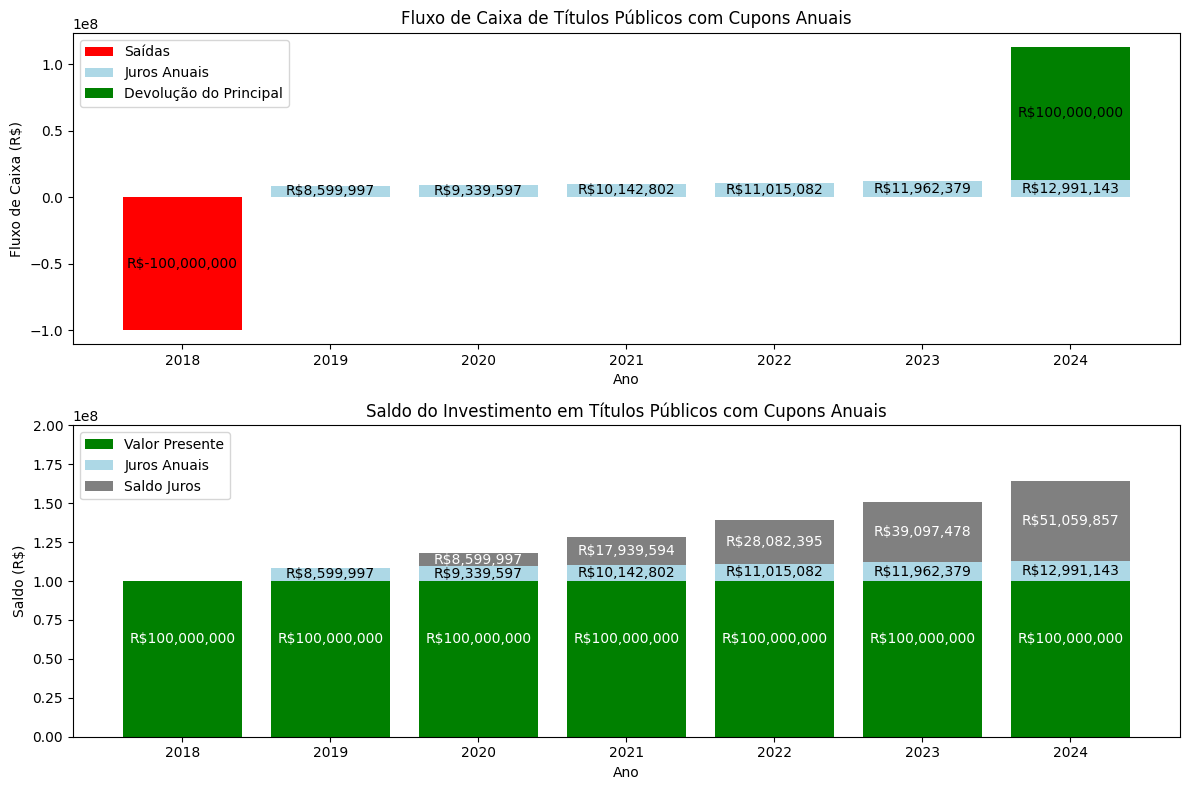

In [16]:
# Criando o gráfico de barras
fig, ax = plt.subplots(2,1,figsize=(12, 8))

ax[0].bar(anos, saidas, color='red', label='Saídas')
ax[0].bar(anos, juros, color='lightblue', label='Juros Anuais')
ax[0].bar(anos, resgate, bottom=juros[-1], color='green', label='Devolução do Principal')

ax[0].set_title('Fluxo de Caixa de Títulos Públicos com Cupons Anuais')
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Fluxo de Caixa (R$)')
ax[0].set_xticks(anos)
ax[0].legend()

# Adicionando anotações
for i, value in enumerate(juros):
  if i > 0:
    ax[0].annotate(f'R${value:,.0f}', (anos[i], value / 2), ha='center', va='center', color='black')
ax[0].annotate(f'R${valor_inicial:,.0f}', (anos[-1], valor_inicial / 2 + juros[-1]), ha='center', va='center', color='black')
ax[0].annotate(f'R${-valor_inicial:,.0f}', (anos[0], -valor_inicial / 2), ha='center', va='center', color='black')

ax[1].bar(anos, valor_presente, color='green', label='Valor Presente')
ax[1].bar(anos, juros, bottom=valor_presente, color='lightblue', label='Juros Anuais')
ax[1].bar(anos, saldo, bottom=juros+valor_presente, color='gray', label='Saldo Juros')

ax[1].set_title('Saldo do Investimento em Títulos Públicos com Cupons Anuais')
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('Saldo (R$)')
ax[1].set_xticks(anos)
ax[1].legend()
ax[1].set_ylim(0, 2*100e6)

# Adicionando anotações
for i, value in enumerate(anos):
  ax[1].annotate(f'R${valor_presente[i]:,.0f}', (anos[i], valor_presente[i] / 2 + juros[-1]), ha='center', va='center', color='white')
  if i > 0:
    ax[1].annotate(f'R${juros[i]:,.0f}', (anos[i], juros[i] / 2 + valor_presente[i]), ha='center', va='center', color='black')
  if i > 1:
    ax[1].annotate(f'R${saldo[i]:,.0f}', (anos[i], saldo[i] / 2 + juros[i] + valor_presente[i]), ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

## 6. Efeito de Juros sobre Juros

Foi investido R\$ 1 milhão de reais em um fundo que rendeu 10% a.a. por 20 anos. Ao final do 20o ano, foram vendidas todas as cotas do fundo, resultando em um saldo de R\$ 6,727 milhões. Quanto desse saldo foi gerado de juros sobre os juros?

In [17]:
# Definindo os parâmetros do investimento
valor_inicial = 1
anos = np.arange(21)  # 20 anos
taxa_juros = .1
valor_presente = np.array([valor_inicial for i in anos])

# Calculando os valores dos juros anuais
valor_acumulado = valor_inicial
juros = [0]

for i in range(len(anos)-1):
  juros.append(valor_acumulado * taxa_juros)
  valor_acumulado = valor_acumulado * (1 + taxa_juros)

saldo = np.cumsum(juros) - juros

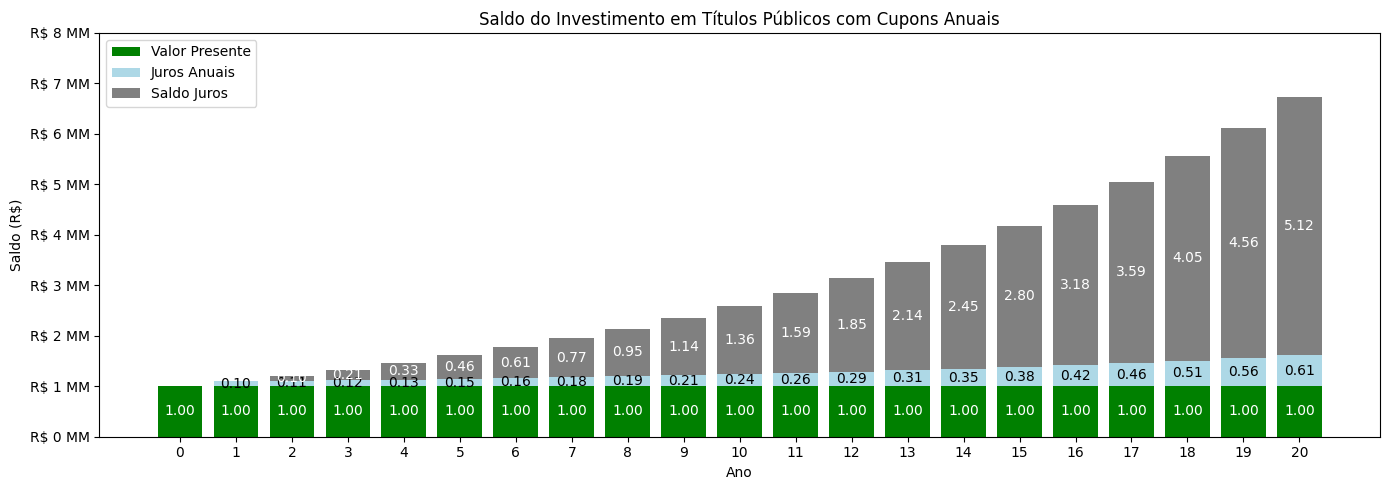

In [18]:
# Criando o gráfico de barras
fig, ax = plt.subplots(1,1,figsize=(14, 5))

ax.bar(anos, valor_presente, color='green', label='Valor Presente')
ax.bar(anos, juros, bottom=valor_presente, color='lightblue', label='Juros Anuais')
ax.bar(anos, saldo, bottom=juros+valor_presente, color='gray', label='Saldo Juros')

ax.set_title('Saldo do Investimento em Títulos Públicos com Cupons Anuais')
ax.set_xlabel('Ano')
ax.set_ylabel('Saldo (R$)')
ax.set_xticks(anos)
ax.legend()
ax.set_ylim(0, 8)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('R$ {x:,.0f} MM'))

# Adicionando anotações
for i, value in enumerate(anos):
  ax.annotate(f'{valor_presente[i]:,.2f}', (anos[i], valor_presente[i] / 2), ha='center', va='center', color='white')
  if i > 0:
    ax.annotate(f'{juros[i]:,.2f}', (anos[i], juros[i] / 2 + valor_presente[i]), ha='center', va='center', color='black')
  if i > 1:
    ax.annotate(f'{saldo[i]:,.2f}', (anos[i], saldo[i] / 2 + juros[i] + valor_presente[i]), ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

In [19]:
# Calculando juros sobre os juros
final_total = (saldo[-1] + juros[-1] + valor_presente[-1])*1e6
juros_acumulado = (saldo[-1] + juros[-1])*1e6
juros_sobre_juros = (saldo[-1] - juros[-1])*1e6

# Resultados
print(f'Montante final acumulado: R$ {final_total:,.0f}')
print(f'Juros acumulado: R$ {juros_acumulado:,.0f}')
print(f'Juros sobre os juros: R$ {juros_sobre_juros:,.0f}')

Montante final acumulado: R$ 6,727,500
Juros acumulado: R$ 5,727,500
Juros sobre os juros: R$ 4,504,318


## Exercício

### Problema 1
Um cliente realizou um investimento de R\$ 100.000,00 e, após 36 meses, resgatou um saldo de R\$ 345.026,61. Determine os juros do período, a taxa mensal considerando juros simples e juros compostos.
Com base nos valores calculados, projete quanto seria o saldo após 12 meses em juros simples e juros compostos.

### Resolução

In [39]:
valor_presente = 100e3
valor_futuro = 345026.61
n = 36
n2 = 48

In [27]:
juros = valor_futuro - valor_presente
juros

245026.61

In [35]:
taxa_mensal_simples = juros / n / valor_presente
taxa_mensal_simples * 100

6.806294722222223

In [36]:
taxa_mensal_composto = (valor_futuro / valor_presente) ** (1/n)-1
taxa_mensal_composto * 100

3.4999999904540946

In [40]:
saldo_simples_48 = valor_presente * (1  + n2 * taxa_mensal_simples)
saldo_simples_48

426702.14666666667

In [42]:
saldo_composto_48 = valor_presente * (1  + taxa_mensal_composto)**n2
saldo_composto_48

521358.89574444114

### Problema 2
Uma empresa pagou ao banco um valor de R\$ 3 milhões referente a uma dívida contraída há 2 anos (24 meses) sem amortização e pagamento de juros anteriormente. Sabendo que a taxa de juros anuais é de 8,5%, calcular os juros pagos, o valor original tomado como empréstimo no banco e o saldo dessa dívida depois de 1 ano. Considerar juros compostos.

### Resolução

In [44]:
valor_futuro = 3e6
n = 2
taxa_juros_anual = 0.085

In [45]:
valor_presente = valor_futuro/(1+taxa_juros_anual)**n
valor_presente

2548365.860392024

In [46]:
juros = valor_futuro - valor_presente
juros

451634.1396079762

In [47]:
valor_futuro_12meses = valor_presente * (1+taxa_juros_anual)
valor_futuro_12meses

2764976.9585253457

### Problema 3
Uma empresa tem um histórico de vendas conforme a tabela abaixo. Calcular o CAGR e projetar, com base nele, qual seria o faturamento de 2024 e 2025.

|                       | 2018    | 2019    | 2020    | 2021    | 2022    | 2023    | 2024 | 2025 |
|-----------------------|---------|---------|---------|---------|---------|--------|-|-|
|Receita Bruta (R$ mil) | 202.120 | 233.120 | 295.530 | 310.890 | 343.191 | 386.933 | | |

$$
  CAGR = (\frac{FV}{PV})^{\frac{1}{n}} - 1
$$

### Resolução

In [60]:
receita_bruta = [202120, 233120, 295530, 310890, 343191, 386933]
n = len(receita_bruta)-1 #atenção ao número de períodos (o primeiro é o período zero)

In [61]:
cagr = (receita_bruta[-1]/receita_bruta[0])**(1/n) - 1
cagr

0.13868944813294415

In [62]:
receita_bruta_projetada = list(receita_bruta)
receita_bruta_projetada += [receita_bruta_projetada[-1] * ( 1 + cagr)] # 2024
receita_bruta_projetada += [receita_bruta_projetada[-1] * ( 1 + cagr)] # 2025
receita_bruta_projetada

[202120,
 233120,
 295530,
 310890,
 343191,
 386933,
 440596.52423442446,
 501702.61302979017]

### Exemplo de CAGR da Petz

Para demonstrar o potencial de crescimento da demanda por produtos pets, a Petz analisou em seu prospecto para abertura de capital (IPO) o CAGR do mercado segmentado por canais.

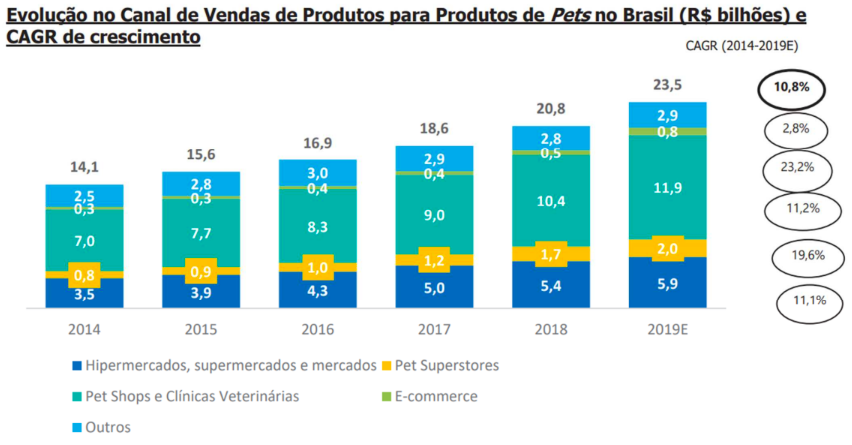

Considerações:
- Queriam mostrar que iriam desenvolver o e-comerce (onde ia investir o dinheiro do IPO)
- Superstores era o foco do momento